# Sales Prediction for Big Mart Outlets using Regression

## Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## Data Description

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.



Train file: CSV containing the item outlet information with sales value

| Variable	| Description | 
|----------------|:--------------------|
| Item_Identifier|Unique product ID |
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type |The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type| The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particular store. This is the outcome variable to be predicted.|
 

Test file: CSV containing item outlet combinations for which sales need to be forecasted

|Variable	|Description|
|------------|:-----------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|

In [6]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import io
%cd "C:\Users\hp\Desktop\Datasets\bigmartsales"

C:\Users\hp\Desktop\Datasets\bigmartsales


-> Train file is complete data including dependent variable(y)

-> Test file will not have dependent variable(y) which needs to be predicted using model built on train data sample     submission file is where predictions are copied for uploading into competition site for checking the result and accuracy

In [8]:
train_df=pd.read_csv('train_v9rqX0R.csv')
test_df=pd.read_csv('test_AbJTz2l.csv')

In [9]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [13]:
# temporarily add item outletsales to test_df
test_df['Item_Outlet_Sales']='test'

In [14]:
#concat both dataframes for data preprocessing
combine_df=pd.concat([train_df,test_df],axis=0)
# axis =1 for row concatenation
# axis=0 fr column concatenation

In [15]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [16]:
combine_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
combine_df.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [18]:
combine_df.Item_Weight=combine_df.Item_Weight.fillna(combine_df.Item_Weight.mean())

In [19]:
combine_df.Item_Weight.value_counts(dropna=False)

Item_Weight
12.792854    2439
17.600000     135
12.150000     127
10.500000     123
13.650000     115
             ... 
7.640000        7
5.905000        7
7.850000        6
4.615000        6
9.035000        6
Name: count, Length: 416, dtype: int64

In [20]:
combine_df.Outlet_Size.value_counts(dropna=False)

Outlet_Size
Medium    4655
NaN       4016
Small     3980
High      1553
Name: count, dtype: int64

In [21]:
combine_df.Outlet_Size=combine_df.Outlet_Size.fillna('missing')

In [22]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [23]:
combine_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
combine_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,test
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,missing,Tier 2,Supermarket Type1,test
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,missing,Tier 2,Supermarket Type1,test
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,missing,Tier 2,Supermarket Type1,test


In [25]:
combine_df.Item_Fat_Content.value_counts(dropna=False)

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [26]:
combine_df.Item_Fat_Content=combine_df.Item_Fat_Content.replace(['reg'],'Regular')

In [27]:
combine_df.Item_Fat_Content=combine_df.Item_Fat_Content.replace(['LF','low fat'],'Low Fat')

In [28]:
combine_df['Item_code']=combine_df.Item_Identifier.apply(lambda x:x[0:2])

In [29]:
combine_df.Item_code.head()   # FD - FOOD DR-DRINKS NC-NON CONSUMABLE

0    FD
1    DR
2    FD
3    FD
4    NC
Name: Item_code, dtype: object

In [30]:
combine_df['Outlet_age']=2024-combine_df.Outlet_Establishment_Year

In [31]:
combine_df.Outlet_age.head()

0    25
1    15
2    25
3    26
4    37
Name: Outlet_age, dtype: int64

In [32]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
 12  Item_code                  14204 non-null  object 
 13  Outlet_age                 14204 non-null  int64  
d

In [33]:
combine_df=combine_df.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1)

In [34]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           14204 non-null  float64
 1   Item_Fat_Content      14204 non-null  object 
 2   Item_Visibility       14204 non-null  float64
 3   Item_Type             14204 non-null  object 
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Identifier     14204 non-null  object 
 6   Outlet_Size           14204 non-null  object 
 7   Outlet_Location_Type  14204 non-null  object 
 8   Outlet_Type           14204 non-null  object 
 9   Item_Outlet_Sales     14204 non-null  object 
 10  Item_code             14204 non-null  object 
 11  Outlet_age            14204 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [35]:
combine_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_code,Outlet_age
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,FD,25
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,15
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.27,FD,25
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,missing,Tier 3,Grocery Store,732.38,FD,26
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,37


In [36]:
combine_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_code', 'Outlet_age'],
      dtype='object')

In [37]:
combine_df.Item_code.value_counts(dropna=False)   # FD - FOOD DR-DRINKS NC-NON CONSUMABLE

Item_code
FD    10201
NC     2686
DR     1317
Name: count, dtype: int64

In [38]:
# split data into numcols and objcols
numcols=combine_df.select_dtypes(include=np.number)
objcols=combine_df.select_dtypes(include='O')

In [39]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_age'], dtype='object')

In [40]:
numcols.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age
count,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,26.169319
std,4.234226,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,15.000000
25%,9.300000,0.027036,94.012000,20.000000
50%,12.792854,0.054021,142.247000,25.000000
75%,16.000000,0.094037,185.855600,37.000000
max,21.350000,0.328391,266.888400,39.000000


In [41]:
objcols.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_code'],
      dtype='object')

In [42]:
for col in objcols[0:5]:
    freq=objcols[col].value_counts(dropna=False)
    print(freq)

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64
Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64
Outlet_Size
Medium     4655
missing    4016
Small      3980
High       1553
Name: count, dtype: int64
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64
Outlet_Type
Supermark

In [43]:
numcols.head() # variables are in different unit sizes - scaling must be done

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age
0,9.30,0.016047,249.8092,25
1,5.92,0.019278,48.2692,15
2,17.50,0.016760,141.6180,25
3,19.20,0.000000,182.0950,26
4,8.93,0.000000,53.8614,37


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()

In [46]:
numcols_scaled=scaler.fit_transform(numcols)

In [47]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [48]:
numcols_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age
0,-0.824939,-0.969852,1.752511,-0.139681
1,-1.623224,-0.907063,-1.493696,-1.334228
2,1.111729,-0.956000,0.009874,-0.139681
3,1.513233,-1.281712,0.661838,-0.020226
4,-0.912325,-1.281712,-1.403623,1.293777


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
minmax=MinMaxScaler()

In [51]:
numcols_minmax=minmax.fit_transform(numcols)

In [52]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [53]:
numcols_minmax.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age
0,0.282525,0.048866,0.927507,0.416667
1,0.081274,0.058705,0.072068,0.000000
2,0.770765,0.051037,0.468288,0.416667
3,0.871986,0.000000,0.640093,0.458333
4,0.260494,0.000000,0.095805,0.916667


In [54]:
from sklearn.preprocessing import RobustScaler

In [55]:
robust=RobustScaler()

In [56]:
numcols_robust=robust.fit_transform(numcols)

In [57]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [58]:
numcols_robust.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age
0,-0.521322,-0.566751,1.171145,0.000000
1,-1.025799,-0.518530,-1.023237,-0.588235
2,0.702559,-0.556113,-0.006849,0.000000
3,0.956290,-0.806258,0.433868,0.058824
4,-0.576545,-0.806258,-0.962349,0.705882


In [59]:
import seaborn as sns

<Axes: >

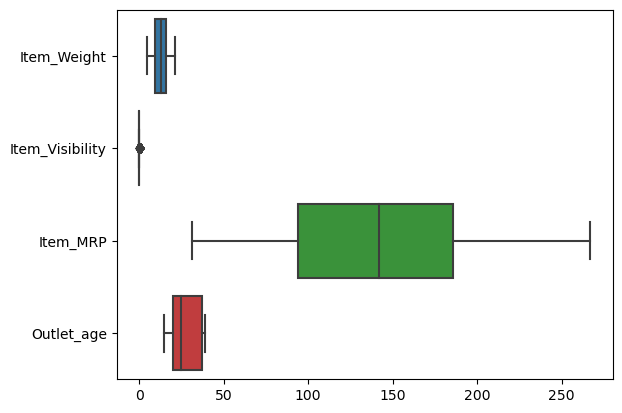

In [60]:
sns.boxplot(numcols,orient='h') # here we can say that item_visibility has outliers if we see lot of outliers we can use robust scaler other wise standardsclaer is good.

<Axes: ylabel='Density'>

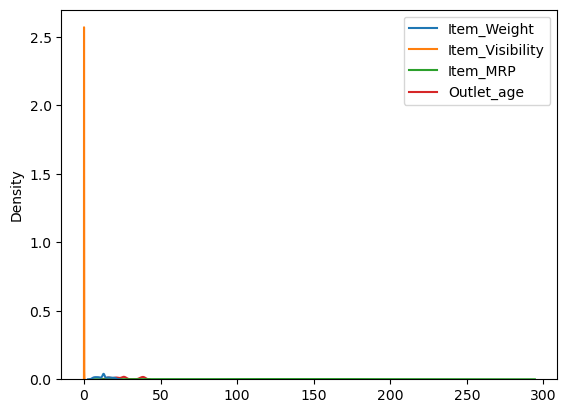

In [61]:
sns.kdeplot(numcols)

<Axes: ylabel='Count'>

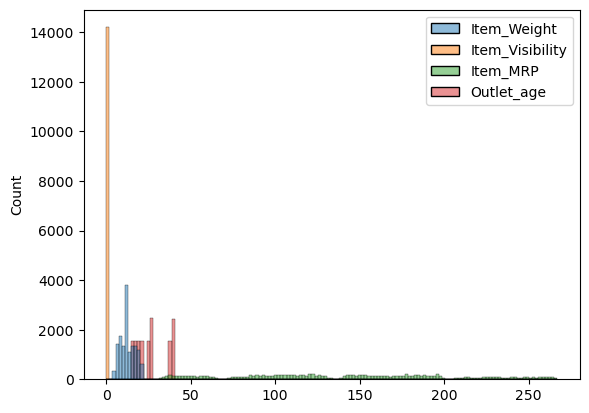

In [62]:
sns.histplot(numcols)

In [63]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_age'], dtype='object')

In [64]:
objcols.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_code'],
      dtype='object')

In [65]:
numcols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Item_Weight      14204 non-null  float64
 1   Item_Visibility  14204 non-null  float64
 2   Item_MRP         14204 non-null  float64
 3   Outlet_age       14204 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 554.8 KB


In [66]:
numcols['Item_Outlet_Sales']=objcols.Item_Outlet_Sales

In [67]:
numcols.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age,Item_Outlet_Sales
0,9.30,0.016047,249.8092,25,3735.138
1,5.92,0.019278,48.2692,15,443.4228
2,17.50,0.016760,141.6180,25,2097.27
3,19.20,0.000000,182.0950,26,732.38
4,8.93,0.000000,53.8614,37,994.7052


In [68]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_age',
       'Item_Outlet_Sales'],
      dtype='object')

In [69]:
objcols['Item_Outlet_Sales']=numcols.Item_Outlet_Sales

In [70]:
objcols.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_code'],
      dtype='object')

In [71]:
numcols=numcols.drop(['Item_Outlet_Sales'],axis=1)

In [72]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_age'], dtype='object')

In [73]:
objcols.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_code'],
      dtype='object')

In [74]:
objcols.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_code
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,2097.27,FD
3,Regular,Fruits and Vegetables,OUT010,missing,Tier 3,Grocery Store,732.38,FD
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC


In [75]:
objcols_dummy=pd.get_dummies(objcols,columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_code'])

In [76]:
objcols_dummy.head()

,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,3735.138,True,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,True,False
1,443.4228,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,2097.27,True,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,732.38,False,True,False,False,False,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
4,994.7052,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True


In [77]:
objcols_dummy=objcols_dummy.replace({True:1,False:0})

In [78]:
objcols_dummy.head()

,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,3735.138,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,443.4228,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,2097.27,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,732.38,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,994.7052,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [79]:
combinedf_clean=pd.concat([numcols_robust.reset_index(),objcols_dummy.reset_index().reset_index()],axis=1)

In [80]:
combinedf_clean=combinedf_clean.drop(['index','level_0'],axis=1)

In [81]:
# split data back to train and test
salestrain_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales!='test']   # numercial data
salestest_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales=='test'] # categorical test as we assigned it at first

In [82]:
salestrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 8522
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_age                       8523 non-null   float64
 4   Item_Outlet_Sales                8523 non-null   object 
 5   Item_Fat_Content_Low Fat         8523 non-null   int64  
 6   Item_Fat_Content_Regular         8523 non-null   int64  
 7   Item_Type_Baking Goods           8523 non-null   int64  
 8   Item_Type_Breads                 8523 non-null   int64  
 9   Item_Type_Breakfast              8523 non-null   int64  
 10  Item_Type_Canned                 8523 non-null   int64  
 11  Item_Type_Dairy                  8523 non-null   int64  
 12  Item_Type_Frozen Foods   

In [83]:
salestest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5681 entries, 8523 to 14203
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Outlet_age                       5681 non-null   float64
 4   Item_Outlet_Sales                5681 non-null   object 
 5   Item_Fat_Content_Low Fat         5681 non-null   int64  
 6   Item_Fat_Content_Regular         5681 non-null   int64  
 7   Item_Type_Baking Goods           5681 non-null   int64  
 8   Item_Type_Breads                 5681 non-null   int64  
 9   Item_Type_Breakfast              5681 non-null   int64  
 10  Item_Type_Canned                 5681 non-null   int64  
 11  Item_Type_Dairy                  5681 non-null   int64  
 12  Item_Type_Frozen Food

In [84]:
salestrain_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,-0.521322,-0.566751,1.171145,0.000000,3735.138,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.025799,-0.518530,-1.023237,-0.588235,443.4228,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,0.702559,-0.556113,-0.006849,0.000000,2097.27,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0.956290,-0.806258,0.433868,0.058824,732.38,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.576545,-0.806258,-0.962349,0.705882,994.7052,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [85]:
salestest_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
8523,1.187634,-0.693352,-0.374384,0.000000,test,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
8524,-0.670575,-0.232724,-0.598051,-0.470588,test,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
8525,0.269723,0.679900,1.083437,0.058824,test,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
8526,-0.817590,-0.576586,0.139226,-0.470588,test,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
8527,0.000000,0.963840,1.001518,0.823529,test,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [86]:
salestest_df=salestest_df.drop('Item_Outlet_Sales',axis=1)

In [87]:
print(salestrain_df.shape)
print(salestest_df.shape)

(8523, 47)
(5681, 46)


<Axes: ylabel='Frequency'>

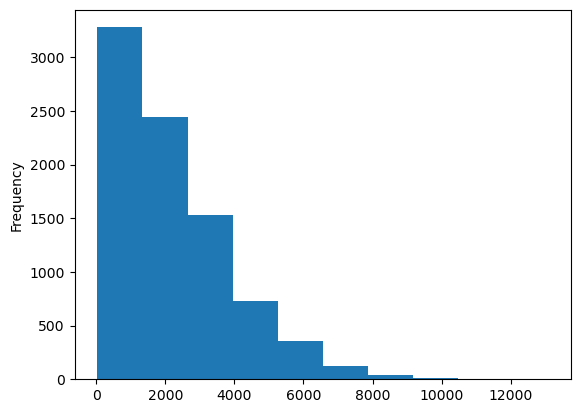

In [88]:
salestrain_df.Item_Outlet_Sales.plot(kind='hist')


<Figure size 3000x1500 with 0 Axes>

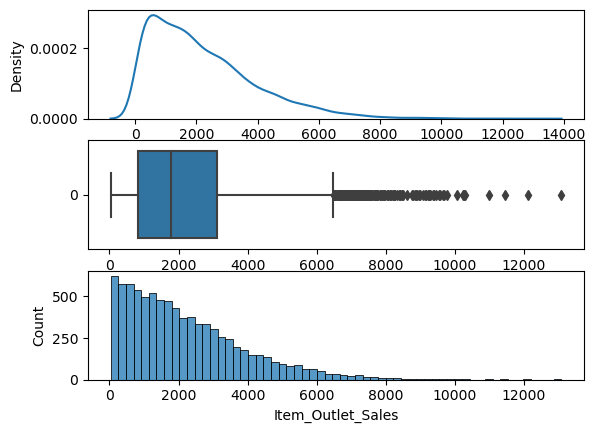

In [89]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(salestrain_df.Item_Outlet_Sales,ax=ax[0])
sns.boxplot(salestrain_df.Item_Outlet_Sales,orient='h',ax=ax[1])
sns.histplot(salestrain_df.Item_Outlet_Sales,ax=ax[2])  
plt.show()   # we can see that left skew 

In [90]:
salestrain_df.Item_Outlet_Sales=salestrain_df.Item_Outlet_Sales.astype('float64')

C:\Users\hp\AppData\Local\Temp\ipykernel_2252\560551408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salestrain_df.Item_Outlet_Sales=salestrain_df.Item_Outlet_Sales.astype('float64')


In [91]:
salestrain_df.Item_Outlet_Sales.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [92]:
y=salestrain_df.Item_Outlet_Sales
X=salestrain_df.drop(['Item_Outlet_Sales'],axis=1)

<Figure size 3000x1500 with 0 Axes>

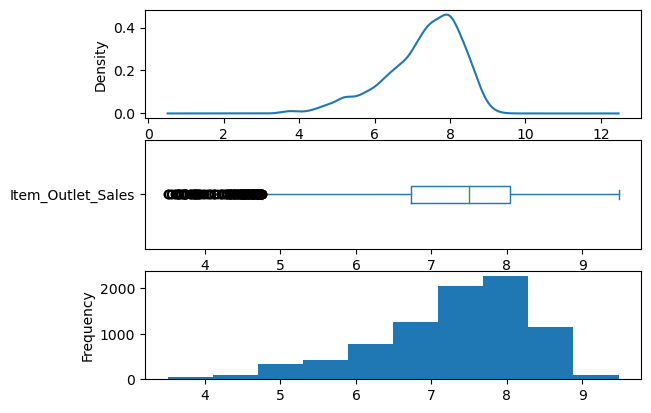

In [93]:
#To achieve normality of the residuals, we apply the log transformation to our dependent variable, which has a 
#positive skew. This reduces the effect of outliers and improves the fit of the linear model.
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
np.log(y).plot(kind='kde',ax=ax[0])
np.log(y).plot(kind='box',vert=False,ax=ax[1])
np.log(y).plot(kind='hist',ax=ax[2])
plt.show()

In [94]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,-0.521322,-0.566751,1.171145,0.000000,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.025799,-0.518530,-1.023237,-0.588235,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,0.702559,-0.556113,-0.006849,0.000000,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0.956290,-0.806258,0.433868,0.058824,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.576545,-0.806258,-0.962349,0.705882,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


## Building Machine learning model

## Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
reg=LinearRegression()

In [97]:
regmodel=reg.fit(X,np.log(y))
##To achieve normality of the residuals, we apply the log transformation to our dependent variable, which has a 
#positive skew. This reduces the effect of outliers and improves the fit of the linear model.

In [98]:
regmodel.score(X,np.log(y))

0.7213876943174335

In [99]:
regpredict=regmodel.predict(X)

In [100]:
regresid=y-regpredict

In [101]:
np.sqrt(np.mean(regresid**2))

2763.3203381308235

In [102]:
regtestpredict=regmodel.predict(salestest_df)

In [103]:
regtestpredict=np.exp(regtestpredict)
#Since our dependent variable (y) is log-transformed, we need to apply the exponential function to convert our 
#predictions from log scale to normal scale.

In [104]:
pd.DataFrame(regtestpredict).to_csv('reg.csv')

### Desicion tree 

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
tree=DecisionTreeRegressor(max_depth=12)

In [107]:
treemodel=tree.fit(X,np.log(y))

In [108]:
treemodel.score(X,np.log(y))

0.8315351533735573

In [109]:
treepredict=treemodel.predict(X)

In [110]:
treeresid=y-treepredict

In [111]:
np.sqrt(np.mean(treeresid**2))

2763.276537535243

In [112]:
treetestred=treemodel.predict(salestest_df)

In [113]:
treetestpred=np.exp(treetestred)

In [114]:
pd.DataFrame(treetestpred).to_csv("tree.csv")

## Random forest

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
RF=RandomForestRegressor(max_depth=7,n_estimators=5000)

In [117]:
RFmodel=RF.fit(X,np.log(y))

In [118]:
RFmodel.score(X,np.log(y))

0.7657247944651301

In [119]:
rfpredict=RFmodel.predict(X)

In [120]:
rfresid=y-rfpredict

In [121]:
np.sqrt(np.mean(rfresid**2))

2763.3161382180133

In [122]:
RFtestpredict=RFmodel.predict(salestest_df)

In [123]:
RFtestpredict=np.exp(RFtestpredict)
#Since our dependent variable (y) is log-transformed, we need to apply the exponential function to convert our 
#predictions from log scale to normal scale.

In [124]:
pd.DataFrame(RFtestpredict).to_csv('RF.csv')

## Gradient boosting machine

In [125]:
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
gbm=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

In [127]:
gbmmodel=gbm.fit(X,np.log(y))
#To achieve normality of the residuals, we apply the log transformation to our dependent variable, which has a 
#positive skew. This reduces the effect of outliers and improves the fit of the linear model.

In [128]:
gbmmodel.score(X,np.log(y))

0.7556826332919417

In [129]:
gbmpredict=gbmmodel.predict(X)

In [130]:
gbmpredict=np.exp(gbmpredict)

In [131]:
gbmresid=y-gbmpredict

In [132]:
np.sqrt(np.mean(gbmresid**2))

1082.5450130035554

In [133]:
GBMtestpredict=gbmmodel.predict(salestest_df)

In [134]:
GBMtestpredict=np.exp(GBMtestpredict)
#Since our dependent variable (y) is log-transformed, we need to apply the exponential function to convert our 
#predictions from log scale to normal scale.

In [135]:
pd.DataFrame(GBMtestpredict).to_csv('GBM.csv')

## SUPPORT VECTOR REGRESSOR

In [136]:
from sklearn.svm import SVR

In [137]:
svr=SVR(kernel='linear', C=100)

In [138]:
svrmodel=svr.fit(X,np.log(y))
#To achieve normality of the residuals, we apply the log transformation to our dependent variable, which has a 
#positive skew. This reduces the effect of outliers and improves the fit of the linear model.

In [139]:
svrmodel.score(X,np.log(y))

0.7166512769601612

In [140]:
svrpredict=svrmodel.predict(X)

In [141]:
svrpredict=np.exp(svrpredict)

In [142]:
svrresid=y-svrpredict

In [143]:
np.sqrt(np.mean(svrresid**2))

1134.8622210037427

In [144]:
svrtestpredict=svrmodel.predict(salestest_df)

In [145]:
svrtestpredict=np.exp(svrtestpredict)
#Since our dependent variable (y) is log-transformed, we need to apply the exponential function to convert our 
#predictions from log scale to normal scale.

In [146]:
pd.DataFrame(svrtestpredict).to_csv('svr.csv')

## KNN

In [147]:
from sklearn.neighbors import KNeighborsRegressor

In [148]:
knn=KNeighborsRegressor(n_neighbors=5)

In [149]:
knnmodel=knn.fit(X,np.log(y))
#To achieve normality of the residuals, we apply the log transformation to our dependent variable, which has a 
#positive skew. This reduces the effect of outliers and improves the fit of the linear model.

In [150]:
knnmodel.score(X,np.log(y))

0.763546184334263

In [151]:
knnpredict=knnmodel.predict(X)

In [152]:
knnpredict=np.exp(knnpredict)

In [153]:
knnresid=y-knnpredict

In [154]:
np.sqrt(np.mean(knnresid**2))

1046.8056299612163

In [155]:
knntestpredict=knnmodel.predict(salestest_df)

In [156]:
knntestpredict=np.exp(knntestpredict)
#Since our dependent variable (y) is log-transformed, we need to apply the exponential function to convert our 
#predictions from log scale to normal scale.

In [157]:
pd.DataFrame(knntestpredict).to_csv('knn.csv')

## Validating the Score in analytics vidya